# Feature Engineering

In [50]:
import pandas as pd
import numpy as np
import re
import feather
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [51]:
FILENAME = "cleaned_data"
data = feather.read_dataframe(f"Datasets/{FILENAME}.feather")

### Simplify target variable: Severity
To simplify our model, I have chosen to change the multi-value Severity variable into a binary variable where severity=0 represents severity of 1 and 2, while severity=1 represents 3 and 4.

Counter({2: 1308514, 3: 388444, 4: 64208, 1: 22235})


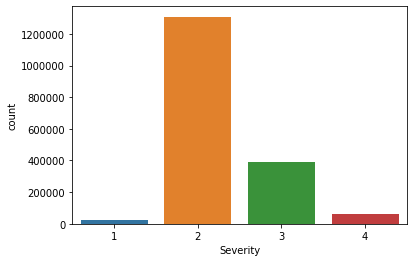

In [52]:
data["Severity"] = data["Severity"].astype(int)
print(Counter(data['Severity']))

sns.countplot(data=data, x="Severity")
plt.show()

Counter({0: 1330749, 1: 452652})


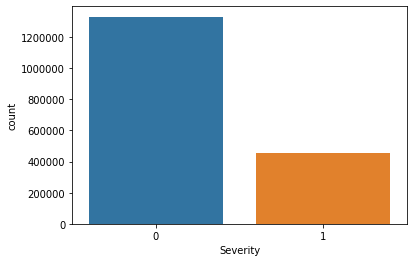

In [53]:
data['Severity'] = np.where(data['Severity']<=2, 0, 1)
print(Counter(data["Severity"]))

sns.countplot(data=data, x="Severity")
plt.show()

### Simplify Wind Direction

In [54]:
Counter(data["Wind_Direction"])

Counter({'N': 49641,
         'VAR': 52363,
         'W': 71861,
         'SSW': 110454,
         'SSE': 95618,
         'NNW': 72464,
         'E': 55729,
         'NE': 64480,
         'West': 69875,
         'S': 81895,
         'Variable': 57689,
         'WSW': 97533,
         'SW': 102396,
         'ESE': 69711,
         'South': 85554,
         'ENE': 67654,
         'NW': 80585,
         'East': 46904,
         'CALM': 181271,
         'WNW': 87229,
         'SE': 77436,
         'NNE': 59696,
         'North': 45363})

* "CALM" = ["Calm", "CALM"]
* "W" = ["W", "West", "WSW", "WNW"] 
* "S" = ["S", "South", "SSW", "SSE"] 
* "N" = ["N", "North", "NNW", "NNE"] 
* "E" = ["E", "East", "ESE", "ENE"]
* "VAR" = ["VAR", "Variable"]

In [55]:
data.loc[data['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
data.loc[(data['Wind_Direction']=='West')|(data['Wind_Direction']=='WSW')|(data['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
data.loc[(data['Wind_Direction']=='South')|(data['Wind_Direction']=='SSW')|(data['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
data.loc[(data['Wind_Direction']=='North')|(data['Wind_Direction']=='NNW')|(data['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
data.loc[(data['Wind_Direction']=='East')|(data['Wind_Direction']=='ESE')|(data['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
data.loc[data['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", data['Wind_Direction'].unique())

Wind Direction after simplification:  ['N' 'VAR' 'W' 'S' 'E' 'NE' 'SW' 'NW' 'CALM' 'SE']


### Simplify Weather Condition

In [56]:
Counter(data['Weather_Condition'])

Counter({'Fair': 475004,
         'Cloudy': 146123,
         'Clear': 289895,
         'Overcast': 116526,
         'Mostly Cloudy': 275893,
         'Partly Cloudy': 192756,
         'Haze': 21618,
         'Scattered Clouds': 90081,
         'Light Rain': 83980,
         'Rain': 20711,
         'Cloudy / Windy': 2106,
         'Thunderstorm': 2431,
         'Smoke': 5156,
         'Light Drizzle': 4629,
         'Heavy Rain': 9209,
         'Mist': 626,
         'Thunderstorms and Rain': 1180,
         'Light Thunderstorms and Rain': 2558,
         'Thunder in the Vicinity': 2402,
         'Shallow Fog': 521,
         'Drizzle': 904,
         'Thunder': 2019,
         'Drizzle and Fog': 61,
         'Fog': 13660,
         'Heavy Thunderstorms and Rain': 1256,
         'T-Storm': 2709,
         'Light Rain with Thunder': 2224,
         'Partly Cloudy / Windy': 1933,
         'Fair / Windy': 5966,
         'Haze / Windy': 97,
         'Heavy T-Storm': 1448,
         'Light Rain / Windy

Using information from https://www.timeanddate.com/weather/glossary.html <br>

* Scattered clouds, partly cloudy = PARTLY CLOUDY <br>
* Overcast, Mostly cloudly, Cloudy = CLOUDY <br>
* Fair, Clear = CLEAR <br>
* Snow (light snow, heavy snow), and wintry mix  = SNOW <br>
* Drizzle, light rain/drizzle, light freezing rain/drizzle = LIGHT RAIN <br>
* Heavy Rain, heavy thunderstorms, heavy t-storm = HEAVY RAIN <br>
* Haze, fog, mist, smoke = fog     *(see https://www.worldatlas.com/articles/what-are-the-differences-between-mist-haze-and-fog.html)*<br>
* Rain, light thunderstorms, thunderstorms, t-storm, thunder = RAIN <br>

In [57]:
conditions = ['Clear', 'Partly Cloudy', 'Cloudy', 'Snow',
              'Heavy Rain', 'Heavy Thunderstorm', 'Thunderstorm', 'Light Rain',  'Rain', 
              'Fog'] 

def get_condition(string, conditions):
    strings = [['clear', 'fair'],
               ['partly cloudy', 'scattered clouds'],
               ['overcast', 'mostly cloudy', 'cloudy'],
               ['snow'],
               ['heavy rain', 'heavy drizzle'],
               ['heavy thunderstorms', 'heavy t-storm'],
               ['thunder', 't-storm'],
               ['drizzle', 'light rain', 'light freezing rain'],
               ['rain', 'thunderstorms', 't-storm', 'thunder', 'showers'],
               ['fog', 'haze', 'mist', 'smoke']]

    for j, k in enumerate(strings):
        for val in k:
            if val in string.lower():
                return conditions[j]
    return 'Others'

res = []
for i in data['Weather_Condition'].values:
    res.append(get_condition(i, conditions))

data['Condition'] = res

for i in conditions+['Others']:
    print(i, ":")
    print(set(data[data['Condition']==i]['Weather_Condition']))
    print(sum(data['Condition']==i))
    print("")

Clear :
{'Clear', 'Fair / Windy', 'Fair'}
770865

Partly Cloudy :
{'Scattered Clouds', 'Partly Cloudy', 'Partly Cloudy / Windy'}
284770

Cloudy :
{'Cloudy / Windy', 'Cloudy', 'Mostly Cloudy / Windy', 'Mostly Cloudy', 'Overcast'}
543958

Snow :
{'Heavy Snow', 'Light Snow'}
22

Heavy Rain :
{'Heavy Drizzle', 'Heavy Rain Showers', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain / Windy'}
9729

Heavy Thunderstorm :
{'Heavy T-Storm / Windy', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain'}
2846

Thunderstorm :
{'Light Thunderstorms and Rain', 'Thunderstorm', 'Light Thunderstorm', 'Thunderstorms and Rain', 'T-Storm / Windy', 'T-Storm', 'Thunder and Hail', 'Thunder and Hail / Windy', 'Thunder', 'Thunder / Windy', 'Light Rain with Thunder', 'Thunder in the Vicinity'}
15716

Light Rain :
{'Light Rain', 'Light Drizzle / Windy', 'Drizzle and Fog', 'Light Rain Shower / Windy', 'Drizzle / Windy', 'Light Rain Shower', 'Light Drizzle', 'Light Rain / Windy', 'Drizzle', 'Light Rain Showers'}
91288

Rain

In [58]:
# Since 'Snow' and 'Others' have very few instances, remove these instances
data = data[(data['Condition']!='Others') & (data['Condition']!='Snow')]

# Replace
data['Weather_Condition'] = data['Condition']
data.drop('Condition', axis=1, inplace=True)

**FIlter out instances with high precipitation but not rainy or storm weather condition**<br>
Since we have the weather condition, we can filter out instances where there is high precipitation but the weather condition was clear.

According to https://bit.ly/36RRc8b, "*Light rainfall is considered less than 0.10 inches of rain per hour. Moderate rainfall measures 0.10 to 0.30 inches of rain per hour. Heavy rainfall is more than 0.30 inches of rain per hour.*"

In [59]:
Counter(data[data['Precipitation(in)']>0.1]['Weather_Condition'])

Counter({'Rain': 6479,
         'Cloudy': 2681,
         'Light Rain': 7531,
         'Heavy Rain': 5245,
         'Thunderstorm': 3197,
         'Partly Cloudy': 718,
         'Heavy Thunderstorm': 1868,
         'Fog': 65,
         'Clear': 284})

In [75]:
# Remove instances 
weather_cols = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)', 'Visibility(mi)', 'Humidity(%)', 'Temperature(F)']
temp = data[(data['Precipitation(in)']>0.3) & (data['Weather_Condition']=='Clear')]\
            [weather_cols+['Severity', 'Start_Time', 'City', 'County_x', 'State_x', 'Airport_Code', 'Weather_Condition']]
temp.sample(5)

,Precipitation(in),Wind_Chill(F),Wind_Speed(mph),Visibility(mi),Humidity(%),Temperature(F),Severity,Start_Time,City,County_x,State_x,Airport_Code,Weather_Condition
1648470,0.34,71.595611,5.8,10.0,79.0,77.0,1,2018-05-16 14:08:02,Burlington,alamance,north carolina,KBUY,Clear
791143,0.80,79.000000,18.0,10.0,96.0,79.0,0,2020-10-29 14:24:19,Montgomery,montgomery,alabama,KMXF,Clear
1456550,0.53,71.794018,4.6,8.0,94.0,75.0,0,2018-08-10 20:00:33,Northport,tuscaloosa,alabama,KTCL,Clear
889812,0.53,71.794018,4.6,8.0,94.0,75.0,1,2018-08-10 20:10:45,Cottondale,tuscaloosa,alabama,KTCL,Clear
251198,0.75,69.464311,19.6,10.0,10.0,76.3,1,2017-05-17 17:23:11,Tombstone,cochise,arizona,KFHU,Clear


A quick research of the weather records (from https://www.wunderground.com/) on those days indeed show that there were no actual rain on those days where the weather was clear and the precipitation was higher than 0.30 inches. Therefore, I will remove them.

In [89]:
data = data[~((data['Precipitation(in)']>0.3) & (data['Weather_Condition']=='Clear'))]

### Create Hour, Weekday, Month, Temperature(K) attributes 

In [90]:
# Convert to datetime format
data['Start_Time'] = pd.to_datetime(data['Start_Time'])

# Create hour, weekday and month attribute
data['Hour'] = data['Start_Time'].dt.hour
data['Weekday'] = data['Start_Time'].dt.weekday
data['Month'] = data['Start_Time'].dt.month

# Convert Farenheit to Kelvin
data["Temperature(K)"] = data["Temperature(F)"].map(lambda value: (value - 32) *5/9 + 273.15)
data.drop("Temperature(F)", axis=1, inplace=True)

### Obtain Street type
We can derive the street type based on the 'Street' attribute which might be useful in prediction.

*Credit to Jinz Wang from https://www.kaggle.com/jingzongwang/usa-car-accidents-severity-prediction for the idea*

In [91]:
st_type =' '.join(data['Street'].unique().tolist()) # flat the array of street name
st_type = re.split(" |-", st_type) # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print('The 40 most common words')
print(*st_type, sep = ", ") 

temp = data[['Severity', 'Street']]
for i in st_type:
    temp[i.strip()] = np.where(data['Street'].str.contains(i, case=True, na = False), True, False)
temp.loc[temp['Road']==1,'Rd'] = True
temp.loc[temp['Highway']==1,'Hwy'] = True

The 40 most common words
, Rd, St, Dr, Ave, N, S, E, W, Blvd, Ln, Highway, Hwy, Way, SW, Pkwy, State, NE, NW, Ct, SE, Road, Pl, Old, US, Route, Cir, Creek, Lake, Park, Hill, County, Trl, Valley, Ridge, Ter, Pike, Mill, I, River


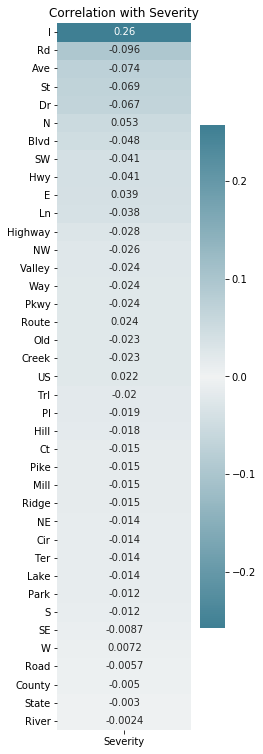

In [92]:
corr = temp[['Severity']+st_type].corr()[["Severity"]]
corr = corr.reindex(corr["Severity"].abs().sort_values(ascending=True).index)[:-2]
m = max(corr['Severity'].abs())
plt.figure(figsize=(3,13))
ax = sns.heatmap(corr, vmax=m, vmin=-m, cmap=sns.diverging_palette(220, 220, as_cmap=True), annot=True);
ax.invert_yaxis()
plt.title("Correlation with Severity")
plt.show()

Pick the top 3 most correlated (by magnitude) street types and add them as dummy variables to our dataset. These are:
* I (interstate highway)
* Rd (basic road)
* Ave (avenue)

In [93]:
top3 = corr[-3:].index # top 3 most correlated street types
data = pd.concat([data, temp[top3]],axis=1)
data.head(3)

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County_x,State_x,Zipcode,...,Transit_County,Walk_County,MedianHouseholdIncome_County,Hour,Weekday,Month,Temperature(K),Ave,Rd,I
0,0,2019-05-21 08:29:55,34.808868,-82.269157,Tanner Rd,R,Greenville,greenville,south carolina,29607-6027,...,0.4,1.4,60351.0,8,1,5,297.594444,False,True,False
1,0,2019-10-07 17:43:09,35.090080,-80.745560,Providence Branch Ln,R,Charlotte,mecklenburg,north carolina,28270-8560,...,2.9,1.9,66641.0,17,0,10,297.594444,False,False,False
2,0,2020-12-13 21:53:00,37.145730,-121.985052,Santa Cruz Hwy,R,Los Gatos,santa clara,california,95033,...,4.4,2.1,124055.0,21,6,12,283.705556,False,False,False


### Save the data

In [94]:
data.reset_index(inplace=True, drop=True)
data.to_feather("Datasets/feateng_data.feather")